In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from pyrosetta import *

In [116]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = ['DeJavu Serif']
plt.rcParams['font.serif'] = ['Times New Roman']
np.set_printoptions(legacy='1.25')

# Import Data

In [140]:
# import data
os.chdir('/home/cadeniran/u1/amphiscan-pep-spin')
data1 = pd.read_csv("rmsd_values1.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
data2 = pd.read_csv("rmsd_values2.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
data3 = pd.read_csv("rmsd_values3.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
data4 = pd.read_csv("rmsd_values4.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
data5 = pd.read_csv("rmsd_values5.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
data6 = pd.read_csv("rmsd_values6.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])

In [101]:
subdir=[]
dir='/home/cadeniran/u1/amphiscan-pep-spin/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()
df = pd.DataFrame(columns=['ID', 'S.1', 'S.2', 'S.3', 'S.4', 'S.5', 'S.6'])
df['ID'] = subdir

In [102]:
for i in range(1,7):
    rmsd, depthlist, scorelist, check = [], [], [], []
    for p in subdir:
        protein = p
        protein_tag = protein.split(sep='_')[0]
        multiple_tag = protein.split(sep='_')[1]
        
        regexp = re.compile(r'The best depth.*?([0-9.-]+)')
        with open('results.{}/{}_{}/txt/{}_{}_renum_best_scores.txt'.format(i,protein_tag,multiple_tag,protein_tag,multiple_tag)) as f:
            for line in f:
                match = regexp.match(line)
                if match:
                    lastCol = line.split(sep=' ')[-1]
                    depthlist.append(match.group(1))
                    check.append(lastCol.strip())
                    scorelist = list(dict.fromkeys(check))
    df['S.{}'.format(i)] = scorelist

In [103]:
df['S.1'] = pd.to_numeric(df['S.1'])
df['S.2'] = pd.to_numeric(df['S.2'])
df['S.3'] = pd.to_numeric(df['S.3'])
df['S.4'] = pd.to_numeric(df['S.4'])
df['S.5'] = pd.to_numeric(df['S.5'])
df['S.6'] = pd.to_numeric(df['S.6'])

# Single Boxplot

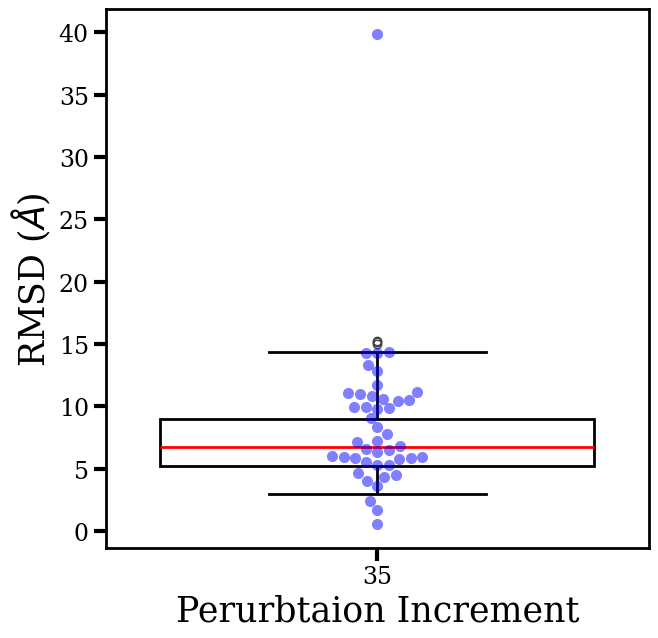

In [141]:
PROPS = {'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'red'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}}

ax = sns.boxplot(x="pert_num", y="RMSD", data=data4, showfliers = True, linewidth=2, **PROPS)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=data1, color="blue", alpha=0.5, size=8)
#ax.set_ylim([0, 20])

plt.xlabel("Perurbtaion Increment", fontsize=25)
plt.ylabel("RMSD ($\AA$)", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

plt.savefig("/home/cadeniran/ipn/figs/boxplot.png", transparent=True, bbox_inches='tight')

# Boxplot: Multiple Results

In [142]:
combined_dfs = pd.DataFrame({'R.1': data1["RMSD"],
                             'R.2': data2["RMSD"],
                             'R.3': data3["RMSD"],
                             'R.4': data4["RMSD"],
                             'R.5': data5["RMSD"],
                             'R.6': data6["RMSD"]})

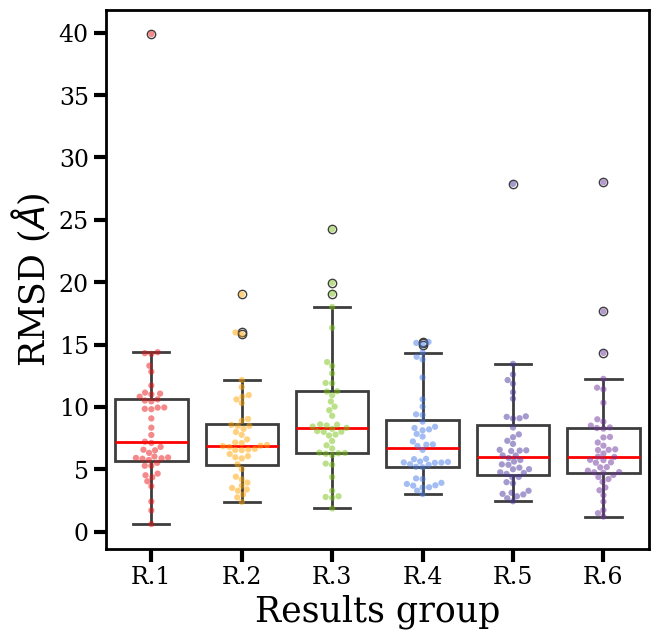

In [143]:
plt.rcParams['figure.figsize'] = 7,7
#colors = ['#09FF10', '#0030D7', '#FF9D09']
colors = ['#e81416', '#ffa500', '#79c314', '#487de7', '#4b369d', '#70369d']

ax = sns.boxplot(data=combined_dfs, linewidth=2, color="white", medianprops=dict(color="red", alpha=1))
ax = sns.swarmplot(data=combined_dfs, palette=colors, alpha=0.5, size=4.5)

#ax.set_ylim([0, 27])
plt.xlabel("Results group", fontsize=25)
plt.ylabel("RMSD ($\AA$)", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

#plt.show()
plt.savefig("/home/cadeniran/ipn/figs/boxplot6.png", transparent=True, bbox_inches='tight')

# Amphiscan 44 Peptide data import

In [5]:
os.chdir('/home/cadeniran/u1/amphiscan-pep-spin')
df = pd.DataFrame(columns=['ID', 'Results.1', 'Results.2', 'Results.3'])

subdir=[]
dir='/home/cadeniran/u1/amphiscan-pep-spin/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()
df['ID'] = subdir

In [6]:
for i in range(1,4):
    rmsd=[]
    for p in subdir:
        with open('results.{}/{}/txt/rmsd.txt'.format(i,p), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            lastCol = last_line.split(sep=' ')[3]
            rmsd.append(lastCol)
    df['Results.{}'.format(i)] = rmsd
df['Results.1'] = pd.to_numeric(df['Results.1'])
df['Results.2'] = pd.to_numeric(df['Results.2'])
df['Results.3'] = pd.to_numeric(df['Results.3'])
df['Lowest'] = df[['Results.1','Results.2','Results.3']].min(axis=1)

In [7]:
# Calculate the average
df['Results.1'].mean(axis=0)

5.434368808511185

In [8]:
df['Results.2'].mean(axis=0)

5.5380090673661115

In [9]:
df['Results.3'].mean(axis=0)

4.840727750699885

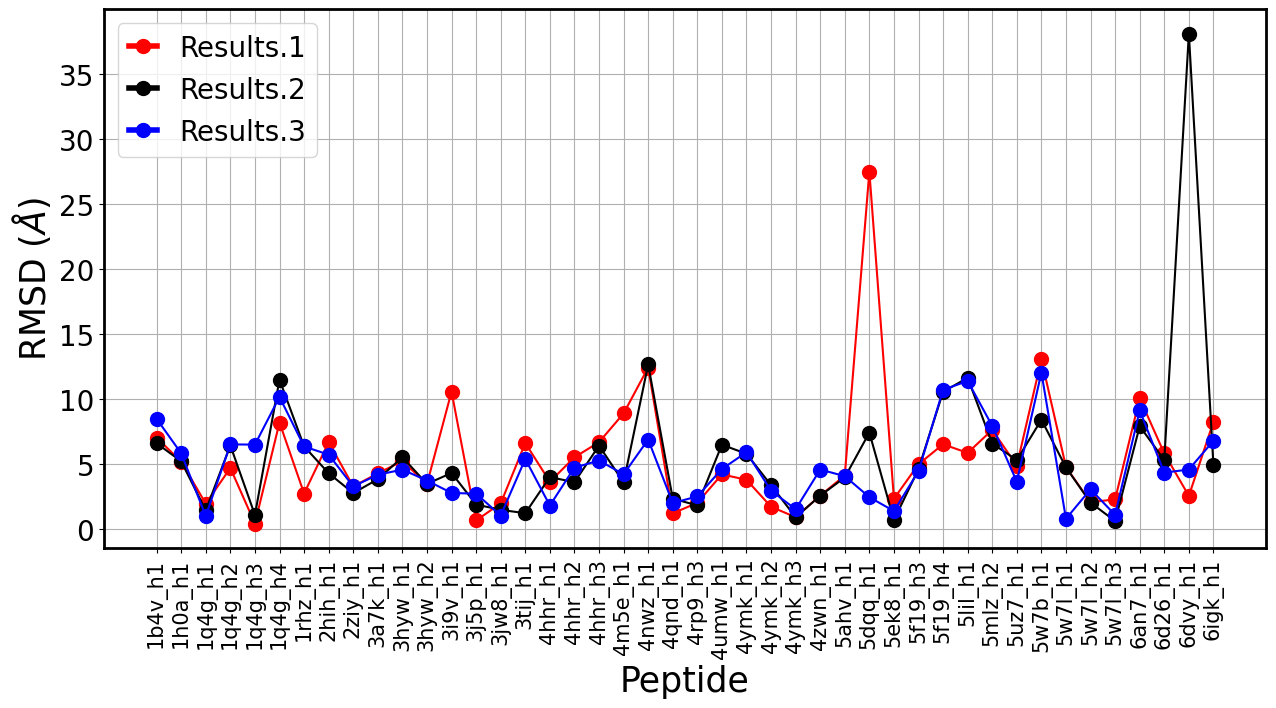

In [10]:
plt.rcParams['figure.figsize'] = 15,7

# Plot the RMSDs
X=df["ID"]
Y1=df["Results.1"]
Y2=df["Results.2"]
Y3=df["Results.3"]

# Plot
plt.plot(X, Y1, marker="o", markersize=10, c='red', label="Results.1")
plt.plot(X, Y2, marker="o", markersize=10, c='black', label="Results.2")
plt.plot(X, Y3, marker="o", markersize=10, c='blue', label="Results.3")

leg = plt.legend(fontsize=20,handlelength=1,loc="best")

# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)

plt.grid(True)
plt.xlabel("Peptide", fontsize=25)
plt.ylabel("RMSD ($\AA$)", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=15)
plt.tick_params(axis='y', labelsize=20)
#plt.ylim(0,17)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/newrmsd44.png", format='png',bbox_inches='tight')

### Plotting absolute lowest RMSD values

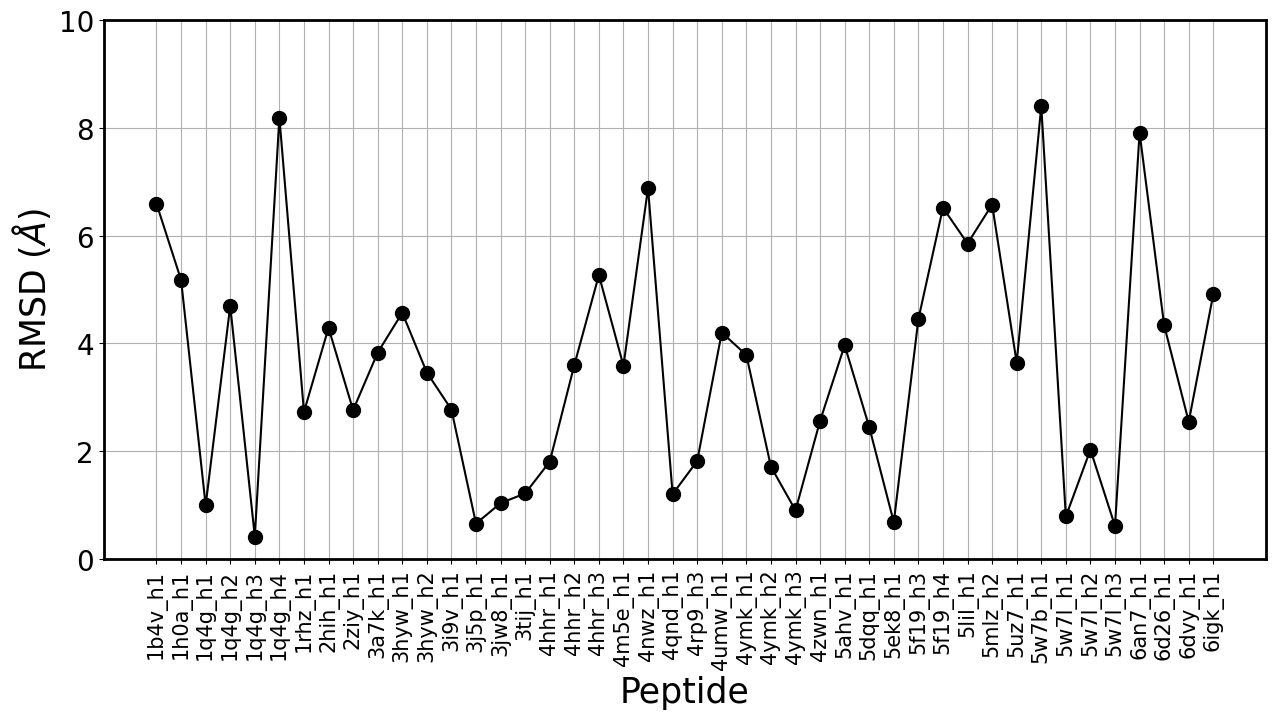

In [11]:
# Plot the RMSDs
X=df["ID"]
Y=df["Lowest"]

# Plot
plt.plot(X, Y, marker="o", markersize=10, c='black', label="Lowest")


plt.grid(True)
plt.xlabel("Peptide", fontsize=25)
plt.ylabel("RMSD ($\AA$)", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=15)
plt.tick_params(axis='y', labelsize=20)
plt.ylim(0,10)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/rmsdlowest.png", format='png',bbox_inches='tight')

# Plot Score

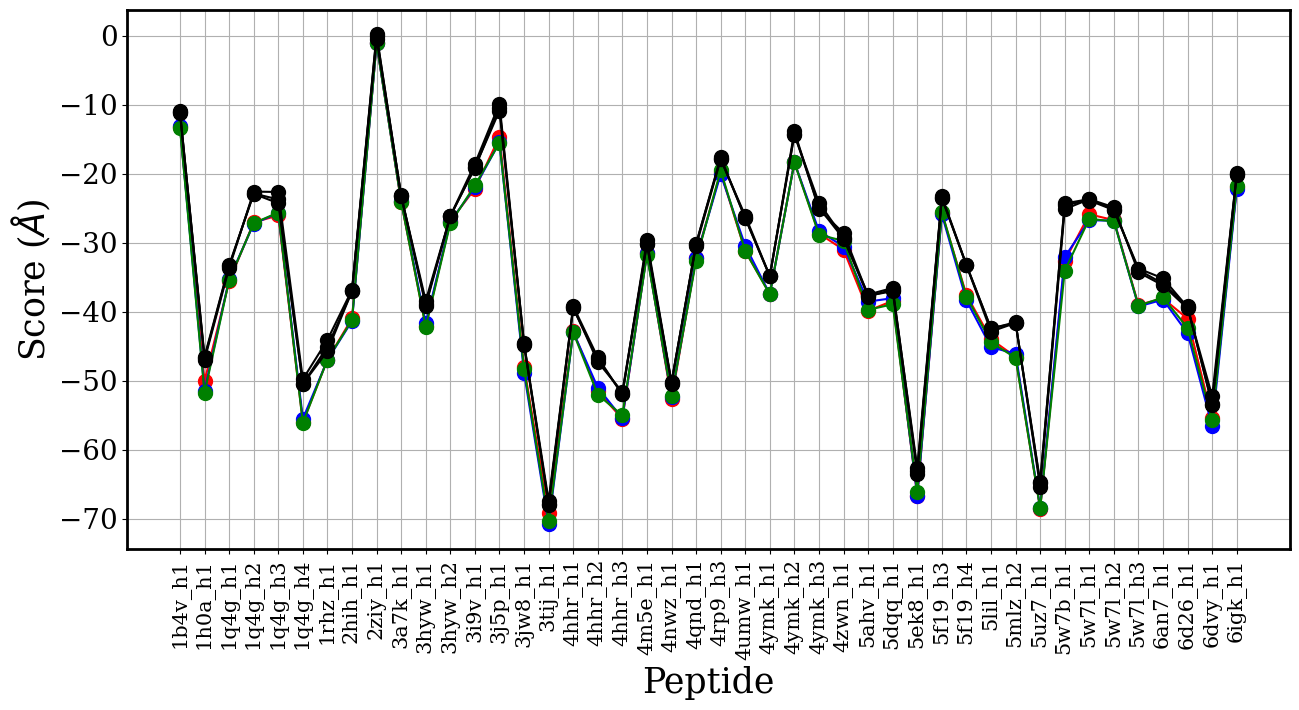

In [121]:
plt.rcParams['figure.figsize'] = 15,7

# Plot the RMSDs
X=df["ID"]
Y1=df["S.1"]
Y2=df["S.2"]
Y3=df["S.3"]
Y4=df["S.4"]
Y5=df["S.5"]
Y6=df["S.6"]

# Plot
plt.plot(X, Y1, marker="o", markersize=10, c='red', label="S.1")
plt.plot(X, Y2, marker="o", markersize=10, c='blue', label="S.2")
plt.plot(X, Y3, marker="o", markersize=10, c='green', label="S.3")
plt.plot(X, Y4, marker="o", markersize=10, c='black', label="S.4")
plt.plot(X, Y5, marker="o", markersize=10, c='black', label="S.5")
plt.plot(X, Y6, marker="o", markersize=10, c='black', label="S.6")

plt.grid(True)
plt.xlabel("Peptide", fontsize=25)
plt.ylabel("Score ($\AA$)", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=15)
plt.tick_params(axis='y', labelsize=20)
#plt.ylim(0,17)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/scatter6.png", format='png',bbox_inches='tight')